In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read data

In [2]:
fp = 'dataset_with_features.csv'

In [3]:
dataset = pd.read_csv(fp)

In [4]:
dataset.sample(2).T

,15,160
fraudulent,True,True
customerEmail,gonzalesjackson@gmail.com,deborah38@yahoo.com
customerPhone,1-410-373-1228x129,06498402936
customerDevice,hmkn4nmfc5q5mgify2zw,vc71dbmrdaz78jgi7nhl
customerIPAddress,229.2.225.188,8f3c:9e11:63b4:73bb:20d1:86c7:ab70:2e04
...,...,...
Vertex Bancorp,0,0
other_methods,1,1
transactions_count,4,1
failed_transactions_count,0.0,0.0


In [5]:
dataset.columns

Index(['fraudulent', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'username', 'domain',
       'is_popular_domain', 'is_disposal_domain', 'valid_email',
       'base_phone_number', 'extention_phone_number',
       'has_extention_phone_number', 'is_foreign_number', 'ip_country_code',
       'is_foreign_ip', 'IPv4', 'order_count', 'unique_order_locations',
       'locations_per_order_ratio', 'avg_order_amount', 'min_order_amount',
       'max_order_amount', 'sum_order_amount', 'fulfilled_order_count',
       'pending_order_count', 'failed_order_count', 'address_mismatch_ratio',
       'payment_method_type_unique_count',
       'payment_method_provider_unique_count',
       'payment_method_issuer_unique_count',
       'paymentMethodRegistrationFailure', 'apple pay', 'bitcoin', 'card',
       'paypal', 'American Express', 'Diners Club / Carte Blanche', 'Discover',
       'JCB 15 digit', 'JCB 16 digit', 'Maestro', 'Mastercard',
  

Columns that won't be useful for our analysis:
* customerEmail
* customerPhone
* customerDevice
* customerIPAddress
* username
* is_disposal_domain *(there's not disposal domains in the dataset)*
* base_phone_number
* extention_phone_number

Also the IP columns are not working, so they can be also removed:
* ip_country_code
* is_foreign_ip
* IPv4

In [6]:
dataset = dataset.drop(columns = ['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress', 
                                  'customerBillingAddress', 'username', 'is_disposal_domain', 'ip_country_code',
                                  'is_foreign_ip', 'IPv4'])

In [7]:
dataset.sample(2).T

,166,22
fraudulent,True,False
domain,jackson-sanders.com,hotmail.com
is_popular_domain,False,True
valid_email,1,1
base_phone_number,962.300.2250,467-222-0933
extention_phone_number,NaN,910.0
has_extention_phone_number,0,1
is_foreign_number,0,0
order_count,6,3
unique_order_locations,4,1


## Analysis

### Email address

In [8]:
pd.crosstab(dataset.fraudulent, dataset.is_popular_domain)

is_popular_domain,False,True
fraudulent,,
False,51,56
True,33,28


In [9]:
pd.crosstab(dataset.fraudulent, dataset.valid_email)

valid_email,0,1
fraudulent,,
False,0,107
True,4,57


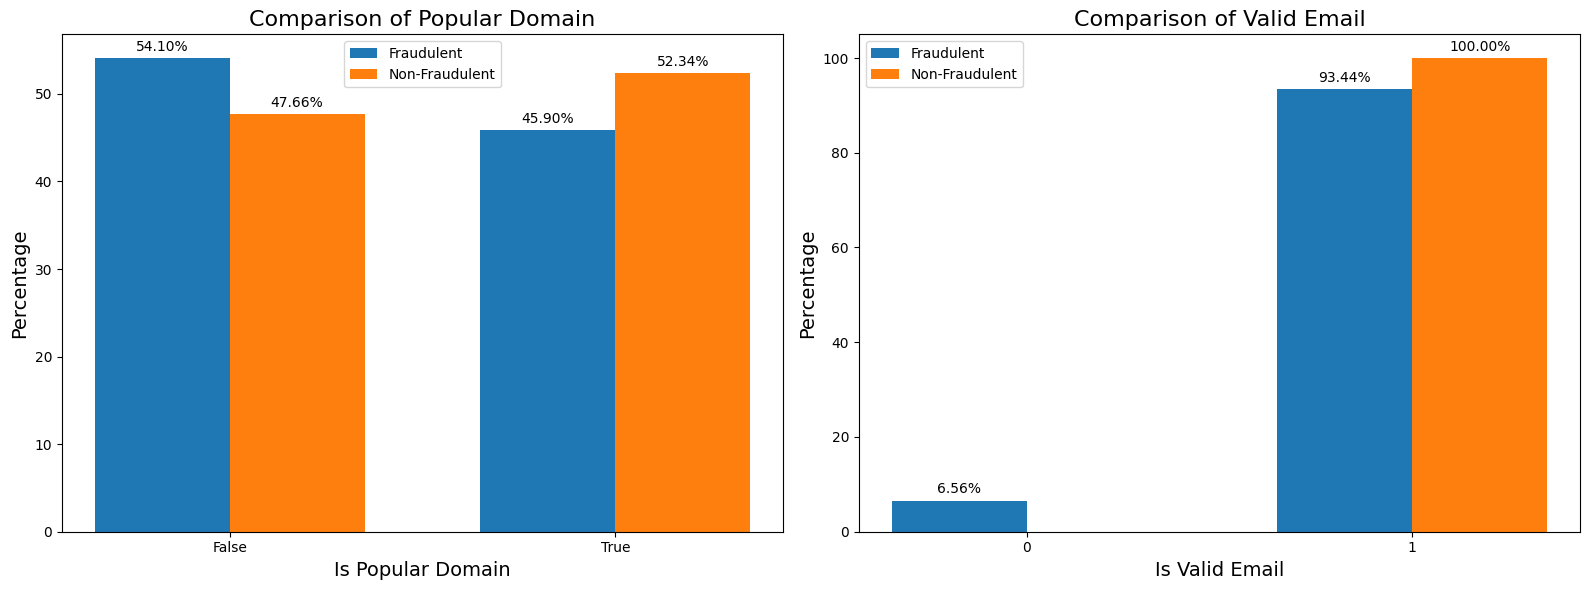

In [10]:
grouped_is_popular_domain = dataset.groupby(['fraudulent', 'is_popular_domain']).size().unstack()
grouped_popular_domain_percentage = grouped_is_popular_domain.div(grouped_is_popular_domain.sum(axis=1), axis=0) * 100

grouped_valid_email = dataset.groupby(['fraudulent', 'valid_email']).size().unstack()
grouped_valid_email_percentage = grouped_valid_email.div(grouped_valid_email.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
bar_width = 0.35

# Plot for popular_domain
r1 = np.arange(len(grouped_popular_domain_percentage.columns))
r2 = [x + bar_width for x in r1]

bar1 = ax1.bar(r1, grouped_popular_domain_percentage.loc[True], bar_width, label='Fraudulent')
bar2 = ax1.bar(r2, grouped_popular_domain_percentage.loc[False], bar_width, label='Non-Fraudulent')


for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.2f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

ax1.set_title('Comparison of Popular Domain', fontsize=16)
ax1.set_xlabel('Is Popular Domain', fontsize=14)
ax1.set_ylabel('Percentage', fontsize=14)
ax1.set_xticks([r + bar_width / 2 for r in range(len(grouped_popular_domain_percentage.loc[True]))], grouped_popular_domain_percentage.loc[True].index)
ax1.legend()
plt.sca(ax1)

# Plot for 'valid_email'
r1 = np.arange(len(grouped_valid_email_percentage.columns))
r2 = [x + bar_width for x in r1]

bar1 = ax2.bar(r1, grouped_valid_email_percentage.loc[True], width=bar_width, label='Fraudulent')
bar2 = ax2.bar(r2, grouped_valid_email_percentage.loc[False], width=bar_width, label='Non-Fraudulent')

for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

ax2.set_title('Comparison of Valid Email', fontsize=16)
ax2.set_xlabel('Is Valid Email', fontsize=14)
ax2.set_ylabel('Percentage', fontsize=14)
ax2.set_xticks([r + bar_width / 2 for r in range(len(grouped_valid_email_percentage.loc[True]))], grouped_valid_email_percentage.loc[True].index)
ax2.legend()
plt.sca(ax2)

plt.tight_layout()
plt.show()

Popular email domains appear more often with non-fraudulent customers.

Invalid email addresses appear only for fraudulent customers.

### Phone number

In [11]:
pd.crosstab(dataset.fraudulent, dataset.has_extention_phone_number)

has_extention_phone_number,0,1
fraudulent,,
False,51,56
True,34,27


In [12]:
pd.crosstab(dataset.fraudulent, dataset.is_foreign_number)

is_foreign_number,0,1
fraudulent,,
False,99,8
True,59,2


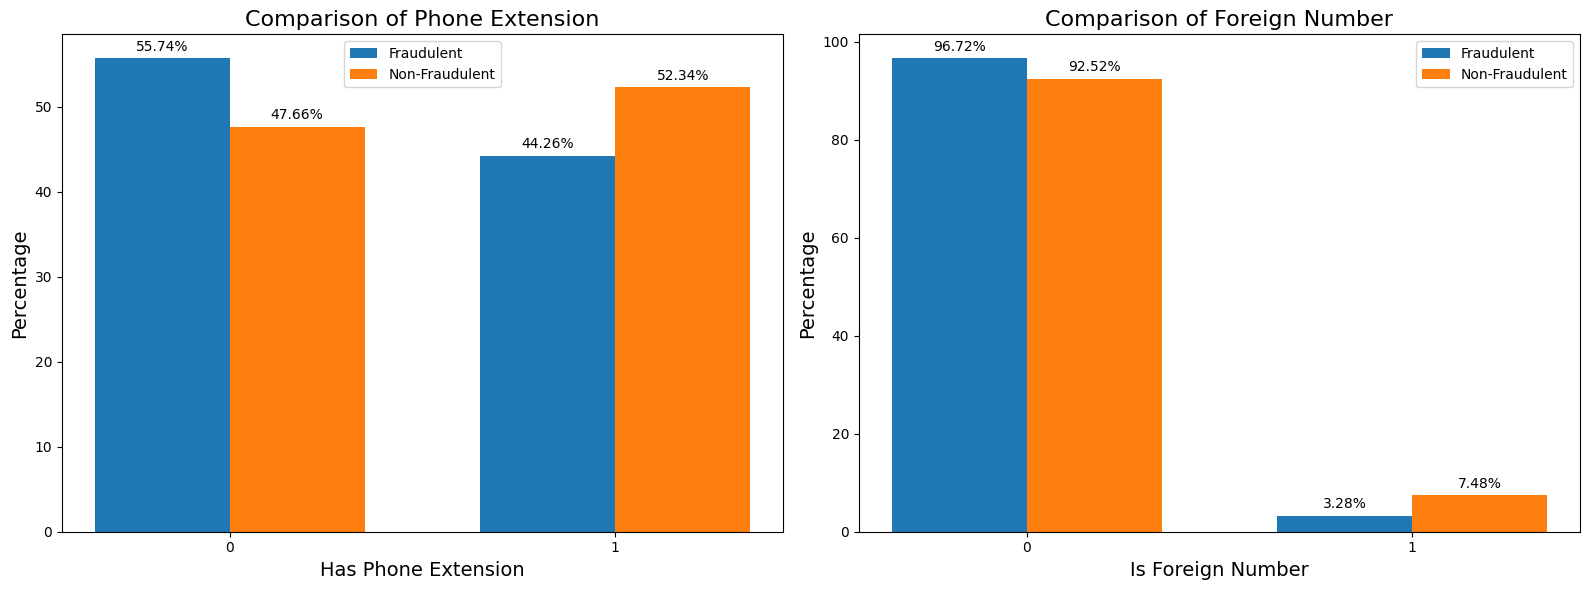

In [13]:
grouped_has_extention_phone_number = dataset.groupby(['fraudulent', 'has_extention_phone_number']).size().unstack()
grouped_extension_percentage = grouped_has_extention_phone_number.div(grouped_has_extention_phone_number.sum(axis=1), axis=0) * 100

grouped_is_foreign_number = dataset.groupby(['fraudulent', 'is_foreign_number']).size().unstack()
grouped_foreign_percentage = grouped_is_foreign_number.div(grouped_is_foreign_number.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
bar_width = 0.35

# Plot for 'has_extention_phone_number'
r1 = np.arange(len(grouped_extension_percentage.columns))
r2 = [x + bar_width for x in r1]

bar1 = ax1.bar(r1, grouped_extension_percentage.loc[True], bar_width, label='Fraudulent')
bar2 = ax1.bar(r2, grouped_extension_percentage.loc[False], bar_width, label='Non-Fraudulent')


for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.2f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

ax1.set_title('Comparison of Phone Extension', fontsize=16)
ax1.set_xlabel('Has Phone Extension', fontsize=14)
ax1.set_ylabel('Percentage', fontsize=14)
ax1.set_xticks([r + bar_width / 2 for r in range(len(grouped_extension_percentage.loc[True]))], grouped_extension_percentage.loc[True].index)
ax1.legend()
plt.sca(ax1)

# Plot for foreign_number
r1 = np.arange(len(grouped_foreign_percentage.columns))
r2 = [x + bar_width for x in r1]

bar1 = ax2.bar(r1, grouped_foreign_percentage.loc[True], width=bar_width, label='Fraudulent')
bar2 = ax2.bar(r2, grouped_foreign_percentage.loc[False], width=bar_width, label='Non-Fraudulent')

for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

ax2.set_title('Comparison of Foreign Number', fontsize=16)
ax2.set_xlabel('Is Foreign Number', fontsize=14)
ax2.set_ylabel('Percentage', fontsize=14)
ax2.set_xticks([r + bar_width / 2 for r in range(len(grouped_foreign_percentage.loc[True]))], grouped_foreign_percentage.loc[True].index)
ax2.legend()
plt.sca(ax2)

plt.tight_layout()
plt.show()

It seems that non-fraudulent customers has more often phone extensions.

The foreign phone number doesn't seem to differentiate if the customer is fraudulent or not. 

### Orders

In [14]:
pd.crosstab(dataset.fraudulent, dataset.order_count)

order_count,0,1,2,3,4,5,6,7,8
fraudulent,,,,,,,,,
False,20,16,14,18,26,13,0,0,0
True,7,9,5,9,10,10,6,1,4


In [15]:
pd.crosstab(dataset['fraudulent'], pd.cut(dataset['avg_order_amount'], bins=20, labels=['Bin{}'.format(i) for i in range(1, 21)]), normalize='index')

avg_order_amount,Bin1,Bin2,Bin3,Bin4,Bin20
fraudulent,,,,,
False,0.505747,0.494253,0.000000,0.000000,0.000000
True,0.333333,0.351852,0.259259,0.037037,0.018519


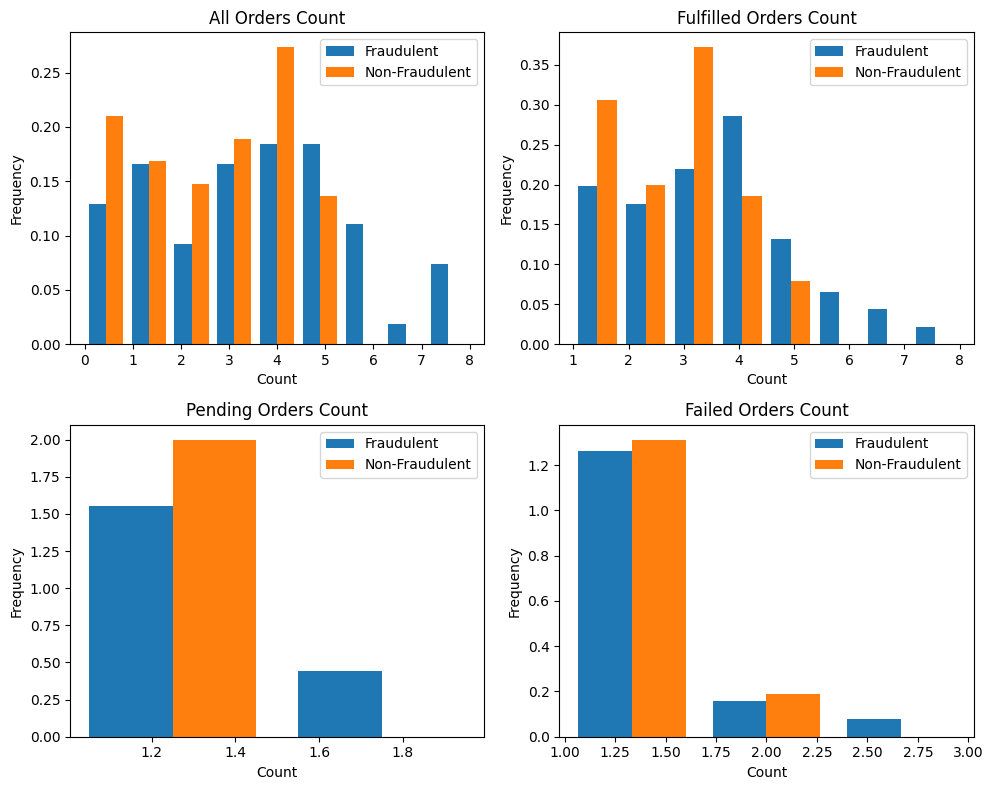

In [16]:
fraudulent_data = {
    'all_order_count': [dataset['order_count'][i] for i in range(len(dataset['order_count'])) if dataset['fraudulent'][i]],
    'fulf_order_count': [dataset['fulfilled_order_count'][i] for i in range(len(dataset['fulfilled_order_count'])) if dataset['fraudulent'][i]],
    'pend_order_count': [dataset['pending_order_count'][i] for i in range(len(dataset['pending_order_count'])) if dataset['fraudulent'][i]],
    'fail_order_count': [dataset['failed_order_count'][i] for i in range(len(dataset['failed_order_count'])) if dataset['fraudulent'][i]]
}

non_fraudulent_data = {
    'all_order_count': [dataset['order_count'][i] for i in range(len(dataset['order_count'])) if not dataset['fraudulent'][i]],
    'fulf_order_count': [dataset['fulfilled_order_count'][i] for i in range(len(dataset['fulfilled_order_count'])) if not dataset['fraudulent'][i]],
    'pend_order_count': [dataset['pending_order_count'][i] for i in range(len(dataset['pending_order_count'])) if not dataset['fraudulent'][i]],
    'fail_order_count': [dataset['failed_order_count'][i] for i in range(len(dataset['failed_order_count'])) if not dataset['fraudulent'][i]]
}

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist([fraudulent_data['all_order_count'], non_fraudulent_data['all_order_count']], bins=9, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[0, 0].set_title('All Orders Count')

axs[0, 1].hist([fraudulent_data['fulf_order_count'], non_fraudulent_data['fulf_order_count']], bins=8, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[0, 1].set_title('Fulfilled Orders Count')

axs[1, 0].hist([fraudulent_data['pend_order_count'], non_fraudulent_data['pend_order_count']], bins=2, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[1, 0].set_title('Pending Orders Count')

axs[1, 1].hist([fraudulent_data['fail_order_count'], non_fraudulent_data['fail_order_count']], bins=3, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[1, 1].set_title('Failed Orders Count')

for ax in axs.flat:
    ax.set_xlabel('Count')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

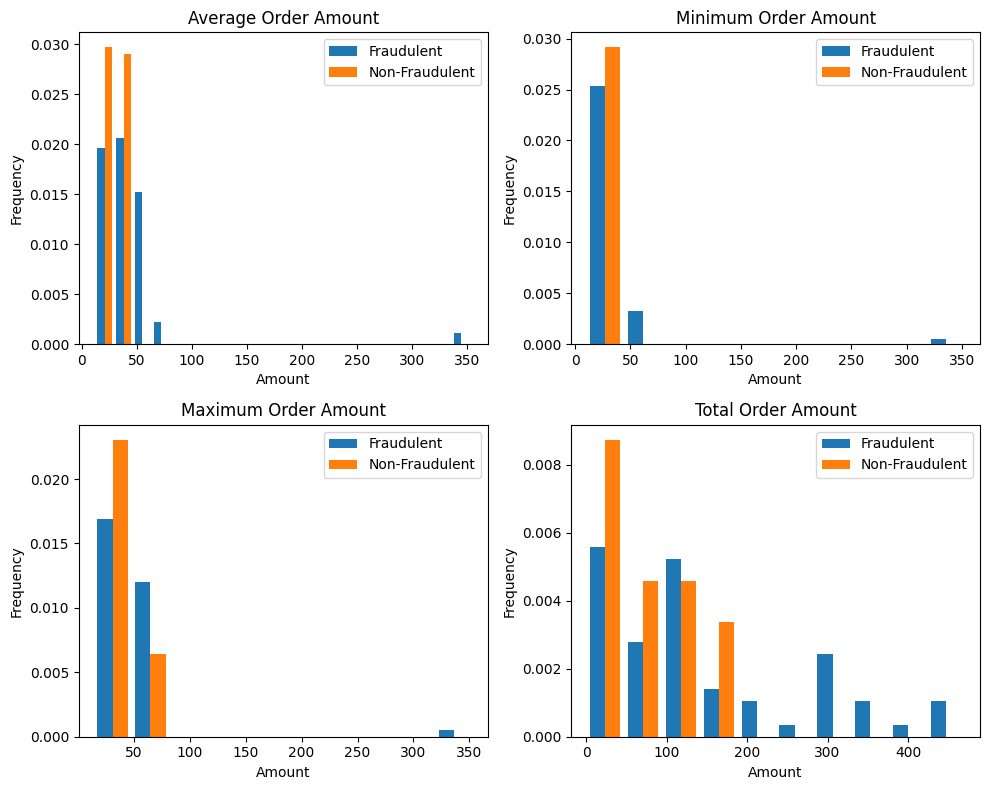

In [17]:
fraudulent_data = {
    'avg_order_amount': [dataset['avg_order_amount'][i] for i in range(len(dataset['avg_order_amount'])) if dataset['fraudulent'][i]],
    'min_order_amount': [dataset['min_order_amount'][i] for i in range(len(dataset['min_order_amount'])) if dataset['fraudulent'][i]],
    'max_order_amount': [dataset['max_order_amount'][i] for i in range(len(dataset['max_order_amount'])) if dataset['fraudulent'][i]],
    'sum_order_amount': [dataset['sum_order_amount'][i] for i in range(len(dataset['sum_order_amount'])) if dataset['fraudulent'][i]]
}

non_fraudulent_data = {
    'avg_order_amount': [dataset['avg_order_amount'][i] for i in range(len(dataset['avg_order_amount'])) if not dataset['fraudulent'][i]],
    'min_order_amount': [dataset['min_order_amount'][i] for i in range(len(dataset['min_order_amount'])) if not dataset['fraudulent'][i]],
    'max_order_amount': [dataset['max_order_amount'][i] for i in range(len(dataset['max_order_amount'])) if not dataset['fraudulent'][i]],
    'sum_order_amount': [dataset['sum_order_amount'][i] for i in range(len(dataset['sum_order_amount'])) if not dataset['fraudulent'][i]]
}

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist([fraudulent_data['avg_order_amount'], non_fraudulent_data['avg_order_amount']], bins=20, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[0, 0].set_title('Average Order Amount')

axs[0, 1].hist([fraudulent_data['min_order_amount'], non_fraudulent_data['min_order_amount']], bins=10, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[0, 1].set_title('Minimum Order Amount')

axs[1, 0].hist([fraudulent_data['max_order_amount'], non_fraudulent_data['max_order_amount']], bins=10, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[1, 0].set_title('Maximum Order Amount')

axs[1, 1].hist([fraudulent_data['sum_order_amount'], non_fraudulent_data['sum_order_amount']], bins=10, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[1, 1].set_title('Total Order Amount')

for ax in axs.flat:
    ax.set_xlabel('Amount')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

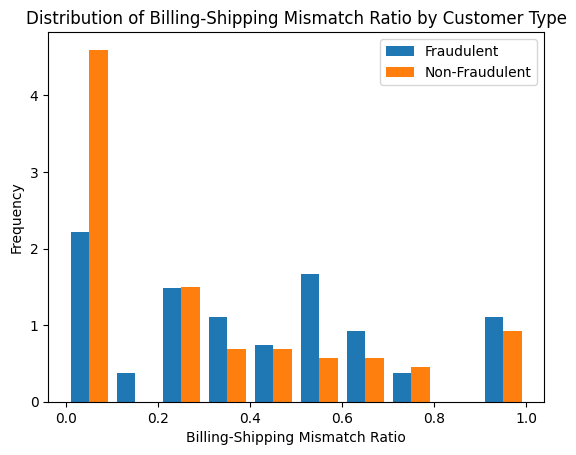

In [18]:
fraudulent_mismatch = [dataset['address_mismatch_ratio'][i] for i in range(len(dataset['address_mismatch_ratio'])) if dataset['fraudulent'][i]]
non_fraudulent_mismatch = [dataset['address_mismatch_ratio'][i] for i in range(len(dataset['address_mismatch_ratio'])) if not dataset['fraudulent'][i]]

plt.hist([fraudulent_mismatch, non_fraudulent_mismatch], bins=10, label=['Fraudulent', 'Non-Fraudulent'], density=True)
plt.xlabel('Billing-Shipping Mismatch Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Billing-Shipping Mismatch Ratio by Customer Type')
plt.legend()
plt.show()

Fraudsters do more orders than non-fraudsters, and so their total order amounts are higher than non-fraudulent customers.

There is a small difference in the average order amount - fraudsters on avergage have slightly more expensive orders than non-fraudsters.

The mismatch between billing address of the customer and the shipping address of the order doesn't seem to distinctly seperate two classes.

### Payment Method

In [19]:
pd.crosstab(dataset.fraudulent, dataset.payment_method_type_unique_count)

payment_method_type_unique_count,0,1,2,3,4
fraudulent,,,,,
False,11,74,21,1,0
True,1,32,20,7,1


In [20]:
pd.crosstab(dataset.fraudulent, dataset.payment_method_provider_unique_count)

payment_method_provider_unique_count,0,1,2,3,4,5,6,7,9
fraudulent,,,,,,,,,
False,11,56,30,8,2,0,0,0,0
True,1,25,13,9,4,3,3,2,1


In [21]:
pd.crosstab(dataset.fraudulent, dataset.payment_method_issuer_unique_count)

payment_method_issuer_unique_count,0,1,2,3,4,5,6,7,9
fraudulent,,,,,,,,,
False,11,55,29,10,2,0,0,0,0
True,1,23,14,7,9,4,1,1,1


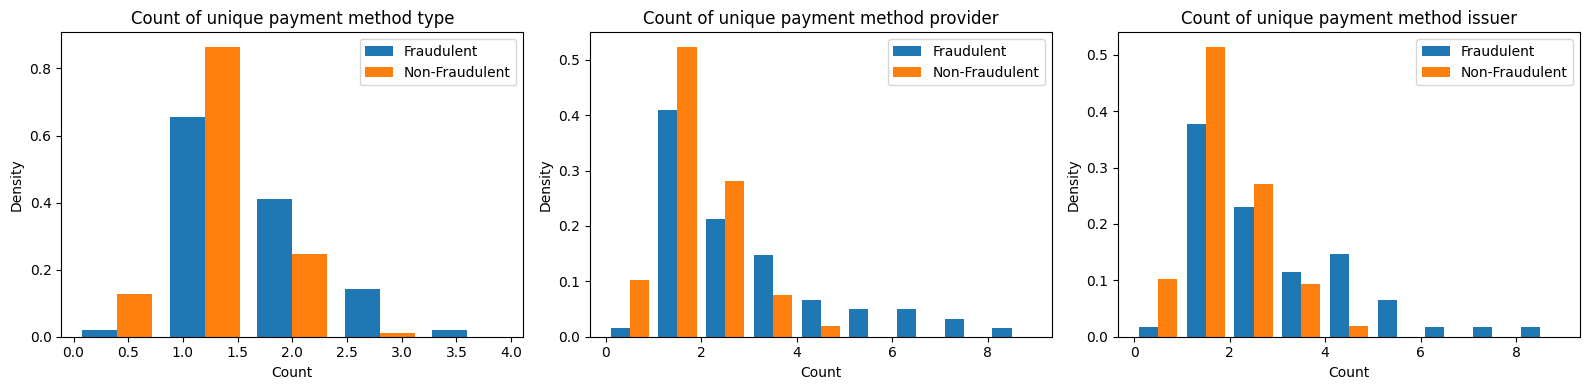

In [49]:
fraudulent_data = {
    'type_unique_count': [dataset['payment_method_type_unique_count'][i] for i in range(len(dataset['payment_method_type_unique_count'])) if dataset['fraudulent'][i]],
    'provider_unique_count': [dataset['payment_method_provider_unique_count'][i] for i in range(len(dataset['payment_method_provider_unique_count'])) if dataset['fraudulent'][i]],
    'issuer_unique_count': [dataset['payment_method_issuer_unique_count'][i] for i in range(len(dataset['payment_method_issuer_unique_count'])) if dataset['fraudulent'][i]],
}

non_fraudulent_data = {
    'type_unique_count': [dataset['payment_method_type_unique_count'][i] for i in range(len(dataset['payment_method_type_unique_count'])) if not dataset['fraudulent'][i]],
    'provider_unique_count': [dataset['payment_method_provider_unique_count'][i] for i in range(len(dataset['payment_method_provider_unique_count'])) if not dataset['fraudulent'][i]],
    'issuer_unique_count': [dataset['payment_method_issuer_unique_count'][i] for i in range(len(dataset['payment_method_issuer_unique_count'])) if not dataset['fraudulent'][i]],
}

fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].hist([fraudulent_data['type_unique_count'], non_fraudulent_data['type_unique_count']], bins=5, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[0].set_title('Count of unique payment method type')

axs[1].hist([fraudulent_data['provider_unique_count'], non_fraudulent_data['provider_unique_count']], bins=9, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[1].set_title('Count of unique payment method provider')

axs[2].hist([fraudulent_data['issuer_unique_count'], non_fraudulent_data['issuer_unique_count']], bins=9, label=['Fraudulent', 'Non-Fraudulent'], density=True)
axs[2].set_title('Count of unique payment method issuer')


for ax in axs.flat:
    ax.set_xlabel('Count')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

Fraudsters seem to use more different types, providers and issuers of payment methods than legit customers. The more of any of these, the more suspicious customer is. 

In [23]:
pd.crosstab(dataset.fraudulent, dataset['apple pay'])

apple pay,0,1,2,3,4
fraudulent,,,,,
False,95,12,0,0,0
True,46,10,2,2,1


In [24]:
print('Percentage of fraudsters using apple pay', 
      np.round(dataset[(dataset['fraudulent'] == True) & (dataset['apple pay'] > 0)].shape[0] / dataset[dataset['fraudulent'] == True].shape[0] * 100, 2))

Percentage of fraudsters using apple pay 24.59


In [25]:
print('Percentage of non-fraudsters using apple pay', 
      np.round(dataset[(dataset['fraudulent'] == False) & (dataset['apple pay'] > 0)].shape[0] / dataset[dataset['fraudulent'] == False].shape[0] * 100, 2))

Percentage of non-fraudsters using apple pay 11.21


In [26]:
pd.crosstab(dataset.fraudulent, dataset.bitcoin)

bitcoin,0,1,2
fraudulent,,,
False,97,10,0
True,46,12,3


In [27]:
print('Percentage of fraudsters using bitcoin', 
      np.round(dataset[(dataset['fraudulent'] == True) & (dataset['bitcoin'] > 0)].shape[0] / dataset[dataset['fraudulent'] == True].shape[0] * 100, 2))

Percentage of fraudsters using bitcoin 24.59


In [28]:
print('Percentage of non-fraudsters using bitcoin', 
      np.round(dataset[(dataset['fraudulent'] == False) & (dataset['bitcoin'] > 0)].shape[0] / dataset[dataset['fraudulent'] == False].shape[0] * 100, 2))

Percentage of non-fraudsters using bitcoin 9.35


In [29]:
pd.crosstab(dataset.fraudulent, dataset.card)

card,0,1,2,3,4,5,6,8,10,11
fraudulent,,,,,,,,,,
False,30,48,21,8,0,0,0,0,0,0
True,7,29,10,4,4,2,2,1,1,1


In [30]:
print('Percentage of fraudsters using card', 
      np.round(dataset[(dataset['fraudulent'] == True) & (dataset['card'] > 0)].shape[0] / dataset[dataset['fraudulent'] == True].shape[0] * 100, 2))

Percentage of fraudsters using card 88.52


In [31]:
print('Percentage of non-fraudsters using card', 
      np.round(dataset[(dataset['fraudulent'] == False) & (dataset['card'] > 0)].shape[0] / dataset[dataset['fraudulent'] == False].shape[0] * 100, 2))

Percentage of non-fraudsters using card 71.96


In [32]:
pd.crosstab(dataset.fraudulent, dataset.paypal)

paypal,0,1,2
fraudulent,,,
False,87,19,1
True,48,11,2


In [33]:
print('Percentage of fraudsters using paypal', 
      np.round(dataset[(dataset['fraudulent'] == True) & (dataset['paypal'] > 0)].shape[0] / dataset[dataset['fraudulent'] == True].shape[0] * 100, 2))

Percentage of fraudsters using paypal 21.31


In [34]:
print('Percentage of non-fraudsters using paypal', 
      np.round(dataset[(dataset['fraudulent'] == False) & (dataset['paypal'] > 0)].shape[0] / dataset[dataset['fraudulent'] == False].shape[0] * 100, 2))

Percentage of non-fraudsters using paypal 18.69


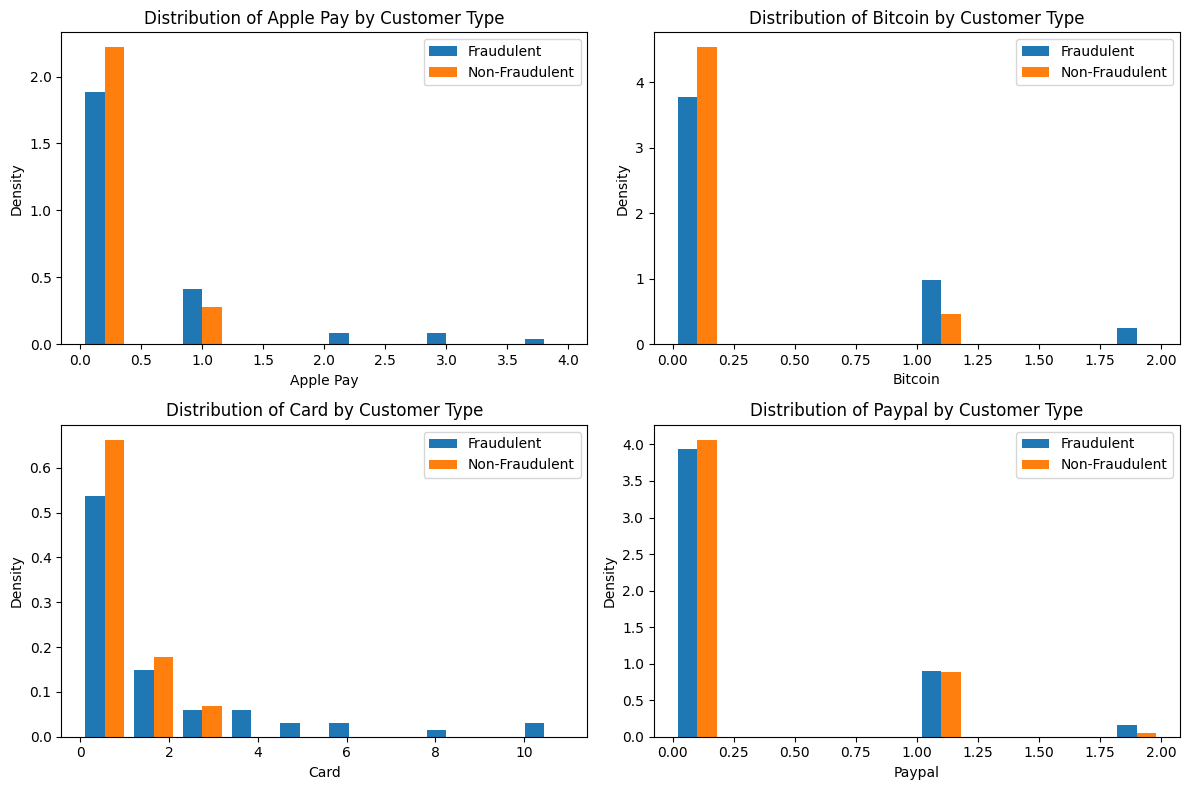

In [35]:
fraudulent_data = {}
non_fraudulent_data = {}
for key in ['apple pay', 'bitcoin', 'card', 'paypal']:
    fraudulent_data[key] = [dataset[key][i] for i in range(len(dataset[key])) if dataset['fraudulent'][i]]
    non_fraudulent_data[key] = [dataset[key][i] for i in range(len(dataset[key])) if not dataset['fraudulent'][i]]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, key in enumerate(['apple pay', 'bitcoin', 'card', 'paypal']):
    row = i // 2
    col = i % 2
    axs[row, col].hist([fraudulent_data[key], non_fraudulent_data[key]], bins=10, label=['Fraudulent', 'Non-Fraudulent'], density=True)
    axs[row, col].set_xlabel(key.replace('_', ' ').title())
    axs[row, col].set_ylabel('Density')
    axs[row, col].set_title(f'Distribution of {key.replace("_", " ").title()} by Customer Type')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

Paypal is the least distintice payment method between fraudsters and non-fraudsters.

Fraudsters choose more often bitcoins than non-fraudsters. They also have more cards than non-fraudsters.

In [51]:
provider_ds = dataset[['fraudulent', 'American Express', 'Diners Club / Carte Blanche', 'Discover', 'JCB 15 digit', 'JCB 16 digit',
                     'Maestro', 'Mastercard', 'VISA 13 digit', 'VISA 16 digit', 'Voyager']]

In [52]:
provider_ds = provider_ds.clip(upper=1)

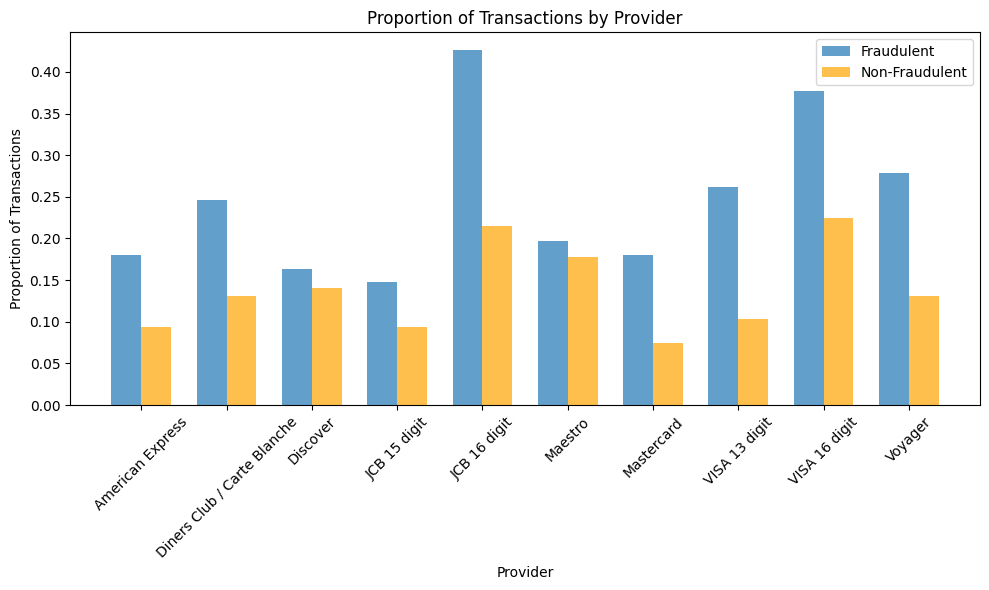

In [56]:
fraudulent_issuer_counts = provider_ds[provider_ds['fraudulent']].sum()
non_fraudulent_issuer_counts = provider_ds[~provider_ds['fraudulent']].sum()

# Calculate proportion of fraudulent transactions for each provider
fraudulent_proportion = fraudulent_issuer_counts / provider_ds[provider_ds['fraudulent'] == True].shape[0]
fraudulent_proportion = fraudulent_proportion.drop('fraudulent')
non_fraudulent_proportion = non_fraudulent_issuer_counts / provider_ds[provider_ds['fraudulent'] == False].shape[0]
non_fraudulent_proportion = non_fraudulent_proportion.drop('fraudulent')

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(fraudulent_proportion))

plt.bar(index, fraudulent_proportion, bar_width, alpha=0.7, label='Fraudulent')
plt.bar(index + bar_width, non_fraudulent_proportion, bar_width, color='orange', alpha=0.7, label='Non-Fraudulent')

plt.xlabel('Provider')
plt.ylabel('Proportion of Transactions')
plt.title('Proportion of Transactions by Provider')
plt.xticks(index + bar_width / 2, fraudulent_proportion.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
issuer_ds = dataset[['fraudulent', 'Bastion Banks', 'Bulwark Trust Corp.', 'Citizens First Banks', 'Fountain Financial Inc.',
                       'Grand Credit Corporation', 'Her Majesty Trust', 'His Majesty Bank Corp.', 'Rose Bancshares', 'Solace Banks',
                       'Vertex Bancorp', 'other_methods']]

In [58]:
issuer_ds = issuer_ds.clip(upper=1)

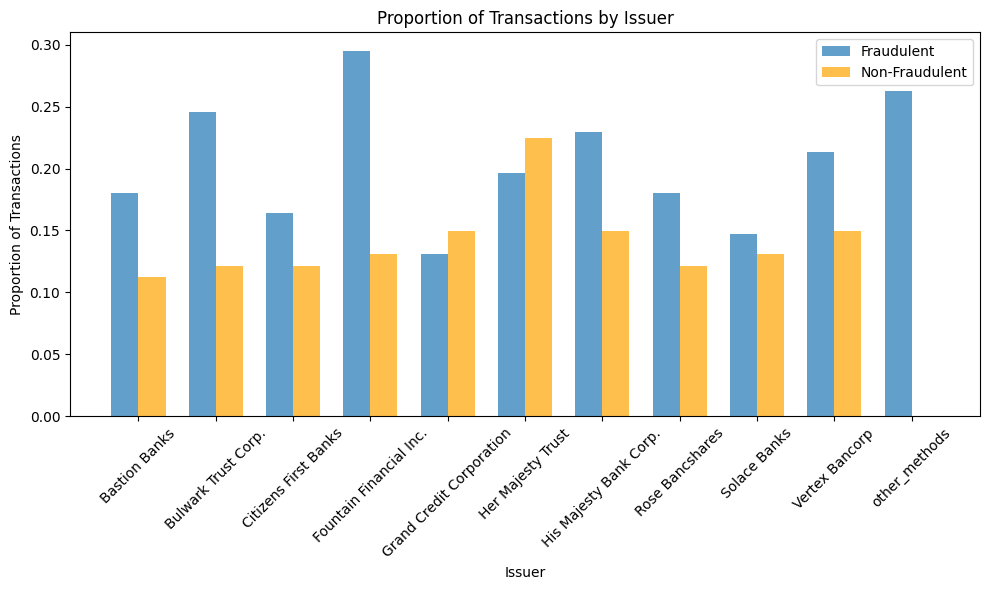

In [59]:
fraudulent_provider_counts = issuer_ds[issuer_ds['fraudulent']].sum()
non_fraudulent_provider_counts = issuer_ds[~issuer_ds['fraudulent']].sum()

# Calculate proportion of fraudulent transactions for each issuer
fraudulent_proportion = fraudulent_provider_counts / issuer_ds[issuer_ds['fraudulent'] == True].shape[0]
fraudulent_proportion = fraudulent_proportion.drop('fraudulent')
non_fraudulent_proportion = non_fraudulent_provider_counts / issuer_ds[issuer_ds['fraudulent'] == False].shape[0]
non_fraudulent_proportion = non_fraudulent_proportion.drop('fraudulent')

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(fraudulent_proportion))

plt.bar(index, fraudulent_proportion, bar_width, alpha=0.7, label='Fraudulent')
plt.bar(index + bar_width, non_fraudulent_proportion, bar_width, color='orange', alpha=0.7, label='Non-Fraudulent')

plt.xlabel('Issuer')
plt.ylabel('Proportion of Transactions')
plt.title('Proportion of Transactions by Issuer')
plt.xticks(index + bar_width / 2, fraudulent_proportion.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

When it comes to providers JCB 16 digit is used very often by fraudsters (compared to non-fraudsters).

The issuers that we should pay attention to are Bulwark Trust Corp., Fountain Financial Inc. and other issuers (so called long-tail).

### Transactions

In [42]:
pd.crosstab(dataset.fraudulent, dataset.transactions_count)

transactions_count,0,1,2,3,4,5,6,7,8,10,11,13,15
fraudulent,,,,,,,,,,,,,
False,20,11,12,9,12,22,12,5,3,0,0,0,1
True,7,7,6,7,7,7,7,6,2,3,1,1,0


In [43]:
pd.crosstab(dataset.fraudulent, dataset.failed_transactions_count)

failed_transactions_count,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,12.0
fraudulent,,,,,,,,,
False,20,33,24,19,7,2,1,0,1
True,7,21,18,9,3,1,1,1,0


In [44]:
pd.crosstab(dataset.fraudulent, dataset.failed_transactions_ratio)

failed_transactions_ratio,-inf,0.000000,0.142857,0.166667,0.200000,0.250000,0.272727,0.285714,0.300000,0.333333,...,0.400000,0.428571,0.461538,0.500000,0.571429,0.600000,0.625000,0.750000,0.800000,1.000000
fraudulent,,,,,,,,,,,,,,,,,,,,,
False,20,33,0,4,10,3,0,2,0,9,...,8,2,0,8,1,2,1,1,1,1
True,7,21,2,4,3,4,1,3,2,5,...,1,0,1,4,1,0,0,0,0,2


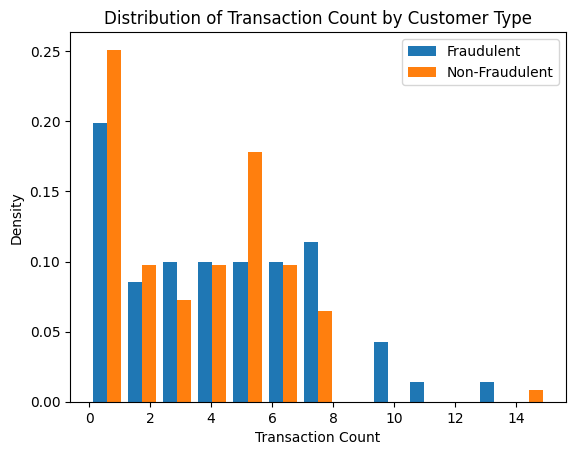

In [45]:
fraudulent_transactions = [dataset['transactions_count'][i] for i in range(len(dataset['transactions_count'])) if dataset['fraudulent'][i]]
non_fraudulent_transactions = [dataset['transactions_count'][i] for i in range(len(dataset['transactions_count'])) if not dataset['fraudulent'][i]]

plt.hist([fraudulent_transactions, non_fraudulent_transactions], bins=13, label=['Fraudulent', 'Non-Fraudulent'], density=True)
plt.xlabel('Transaction Count')
plt.ylabel('Density')
plt.title('Distribution of Transaction Count by Customer Type')
plt.legend()
plt.show()

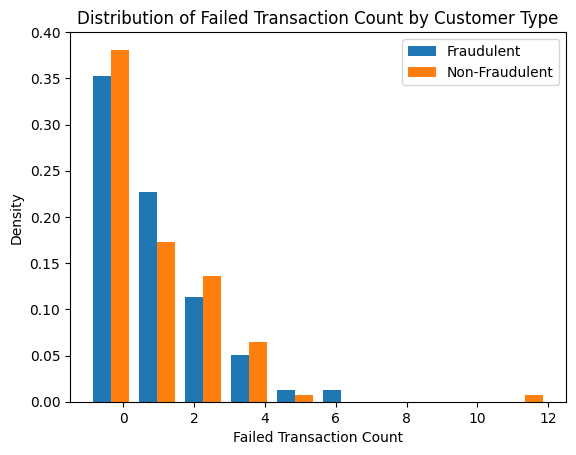

In [46]:
fraudulent_failed_transactions = [dataset['failed_transactions_count'][i] for i in range(len(dataset['failed_transactions_count'])) if dataset['fraudulent'][i]]
non_fraudulent_failed_transactions = [dataset['failed_transactions_count'][i] for i in range(len(dataset['failed_transactions_count'])) if not dataset['fraudulent'][i]]

plt.hist([fraudulent_failed_transactions, non_fraudulent_failed_transactions], bins=10, label=['Fraudulent', 'Non-Fraudulent'], density=True)
plt.xlabel('Failed Transaction Count')
plt.ylabel('Density')
plt.title('Distribution of Failed Transaction Count by Customer Type')
plt.legend()
plt.show()

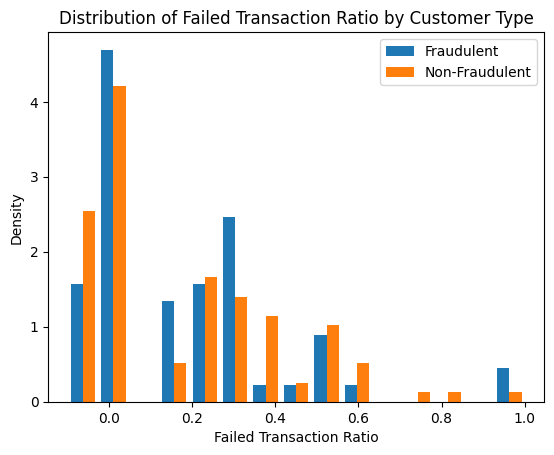

In [47]:
fraudulent_failed_transactions_ratio = [dataset['failed_transactions_ratio'][i] for i in range(len(dataset['failed_transactions_ratio'])) if dataset['fraudulent'][i]]
non_fraudulent_failed_transactions_ratio = [dataset['failed_transactions_ratio'][i] for i in range(len(dataset['failed_transactions_ratio'])) if not dataset['fraudulent'][i]]

fraudulent_failed_transactions_ratio = [-0.1 if x == -np.inf else x for x in fraudulent_failed_transactions_ratio]
non_fraudulent_failed_transactions_ratio = [-0.1 if x == -np.inf else x for x in non_fraudulent_failed_transactions_ratio]

plt.hist([fraudulent_failed_transactions_ratio, non_fraudulent_failed_transactions_ratio], bins=15, label=['Fraudulent', 'Non-Fraudulent'], density=True)
plt.xlabel('Failed Transaction Ratio')
plt.ylabel('Density')
plt.title('Distribution of Failed Transaction Ratio by Customer Type')
plt.legend()
plt.show()

Transactions don't seem to be very informative. There are difference in the ratio of failed transactions, but it is hard to talk about the trends.

## Conclusions

Fraudsters may:
* use invalid email address
* use less popular domains
* have phone numbers without extension
* make more orders
* the total amount of their orders might be high (higher compared to non-fraudsters)
* they would use more than one payment method
* they would choose to pay by bitcoin more often than non-fraudsters
* watch out for payment method provided by JCB 16 digit
* and issued by Bulwark Trust Corp., Fountain Financial Inc. and other issuers (so called long-tail)